# Credit Risk Prediction Notebook

Dokumentasi langkah-langkah end-to-end.

## 1. Setup
Import library dan load dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from preprocess import load_data, initial_inspection, identify_columns, build_preprocessing_pipeline

# Load data
path = 'https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv'
df = load_data(path)
initial_inspection(df)

Shape: (466285, 75)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## 2. Data Understanding
- Tampilkan info data, deskriptif statistik, missing values.

In [4]:
# Descriptive statistics
display(df.describe(include='all').T)

# Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0])

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,NaN,NaN,NaN,233142.0,134605.029472,0.0,116571.0,233142.0,349713.0,466284.0
id,466285.0,NaN,NaN,NaN,13079729.906182,10893711.624551,54734.0,3639987.0,10107897.0,20731209.0,38098114.0
member_id,466285.0,NaN,NaN,NaN,14597660.622827,11682367.44145,70473.0,4379705.0,11941075.0,23001541.0,40860827.0
loan_amnt,466285.0,NaN,NaN,NaN,14317.277577,8286.509164,500.0,8000.0,12000.0,20000.0,35000.0
funded_amnt,466285.0,NaN,NaN,NaN,14291.801044,8274.3713,500.0,8000.0,12000.0,20000.0,35000.0
...,...,...,...,...,...,...,...,...,...,...,...
all_util,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rev_hi_lim,396009.0,NaN,NaN,NaN,30379.087771,37247.129571,0.0,13500.0,22800.0,37900.0,9999999.0
inq_fi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cu_tl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0
max_bal_bc,466285
open_rv_24m,466285
inq_fi,466285
open_rv_12m,466285
il_util,466285
mths_since_rcnt_il,466285
total_bal_il,466285
open_il_24m,466285
open_il_12m,466285
open_il_6m,466285


- Pie chart komposisi loan_status

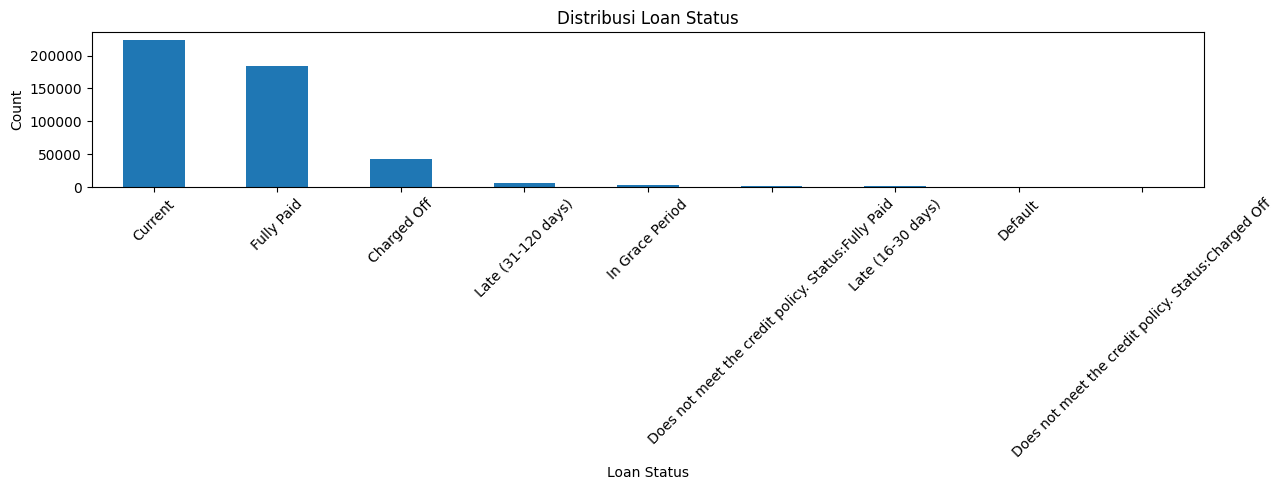

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
df['loan_status'].value_counts().plot(kind='bar')
plt.title('Distribusi Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

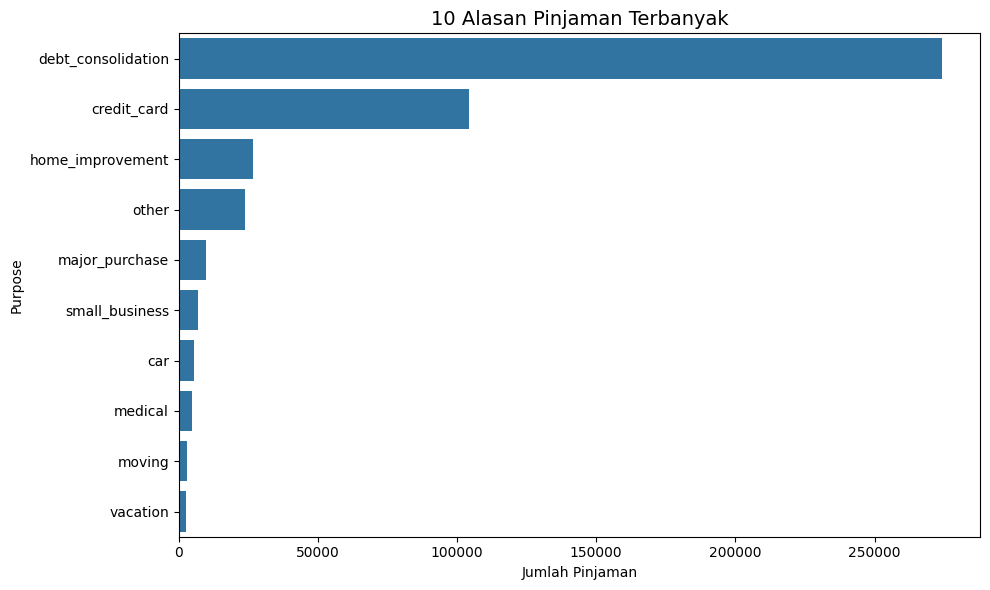

In [6]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().iloc[:10].index)
plt.title('10 Alasan Pinjaman Terbanyak', fontsize=14)
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()

## 3. EDA
Visualisasi distribusi dan korelasi.

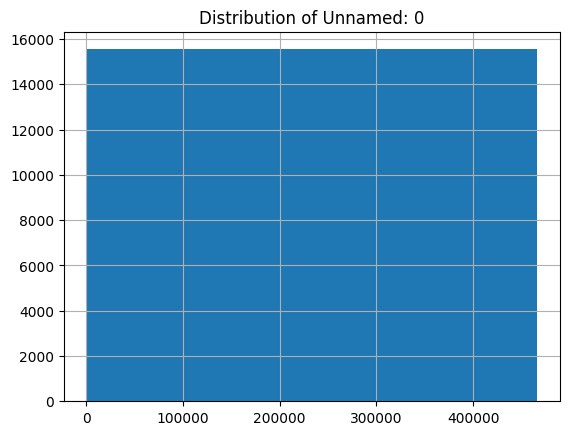

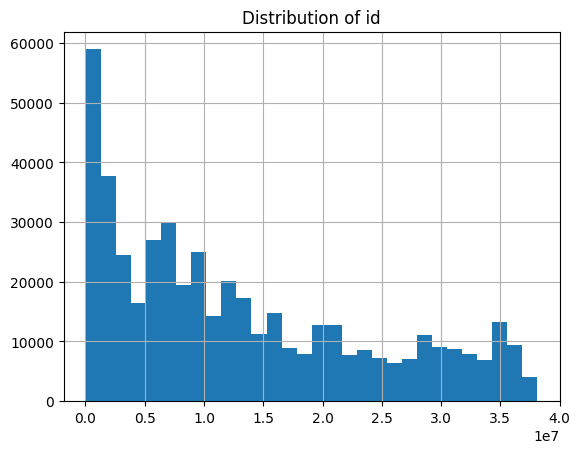

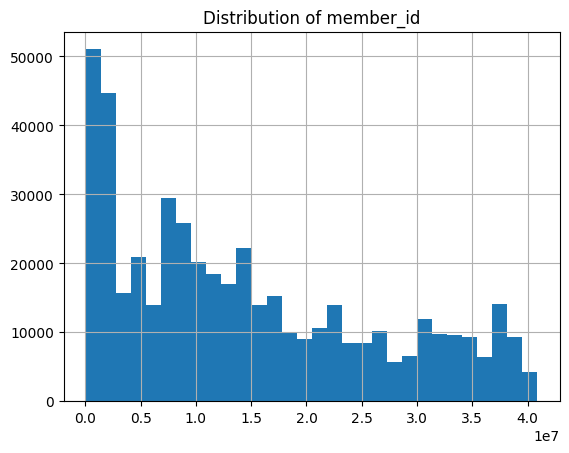

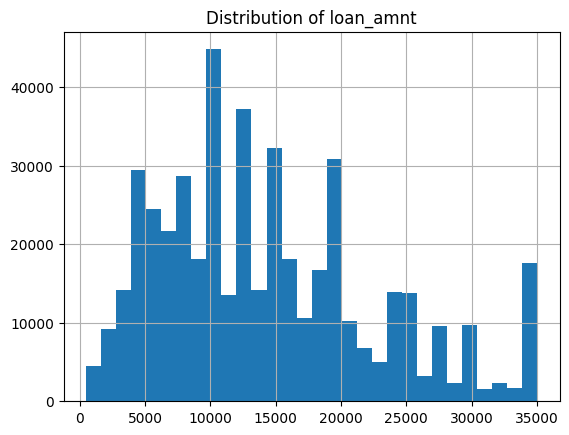

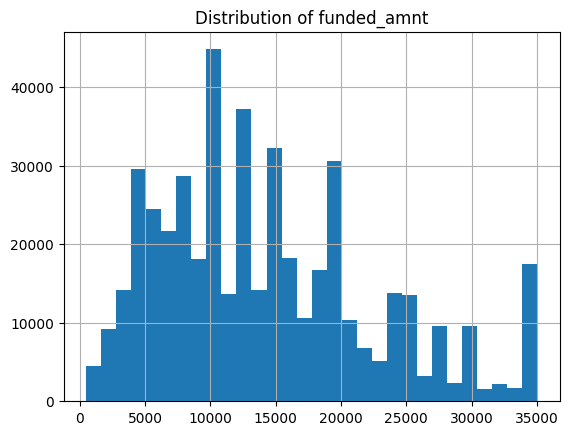

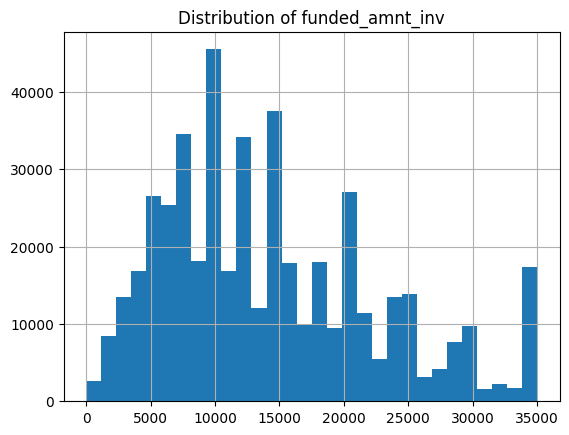

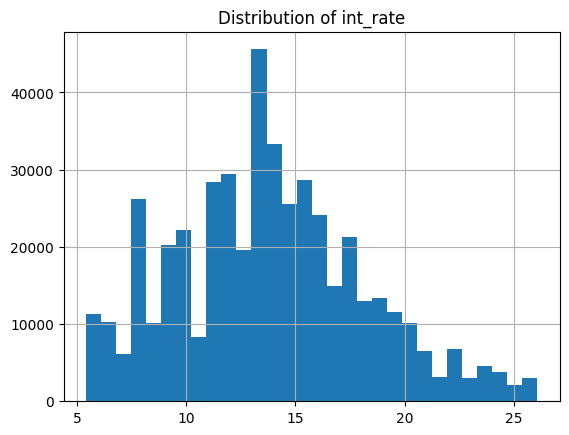

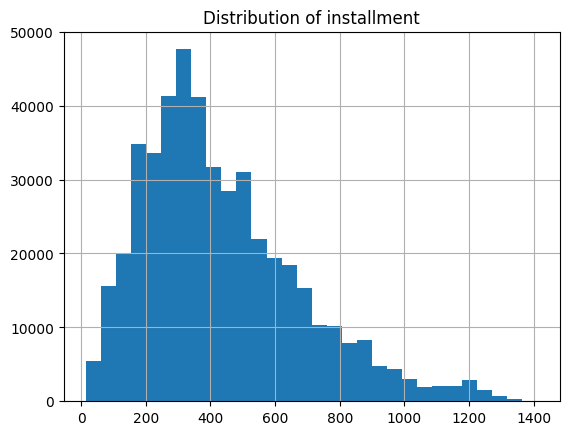

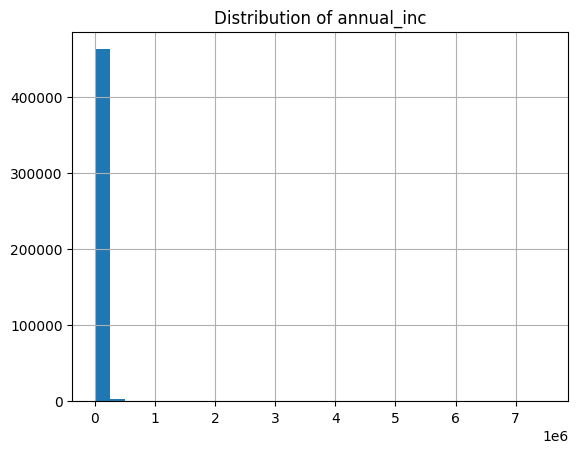

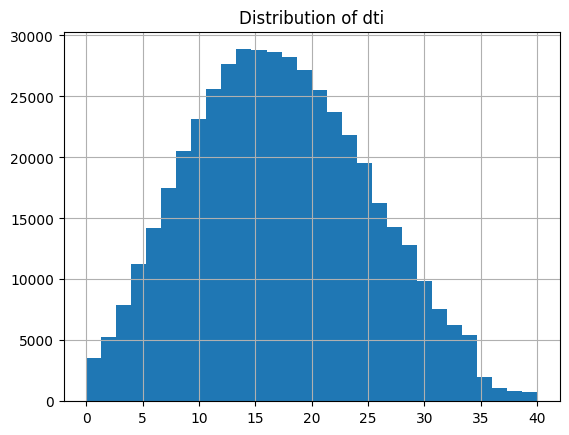

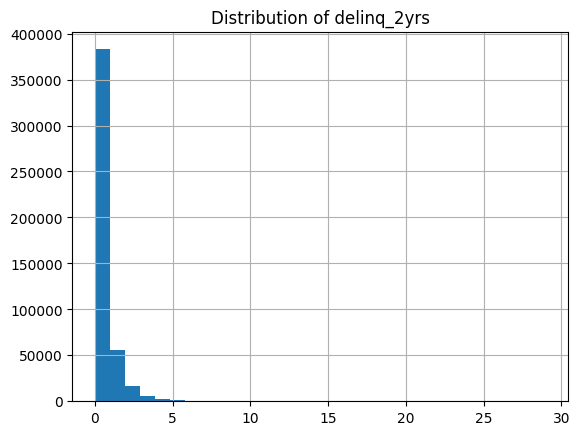

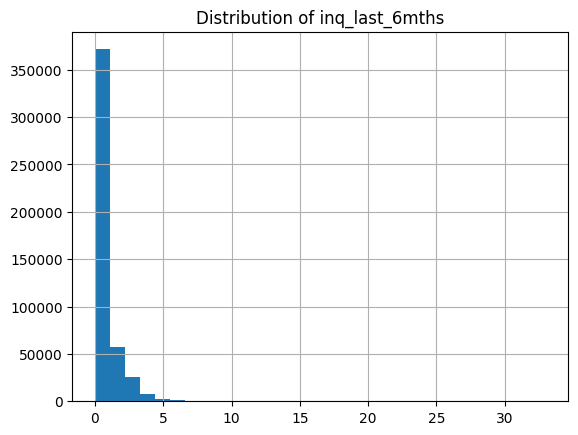

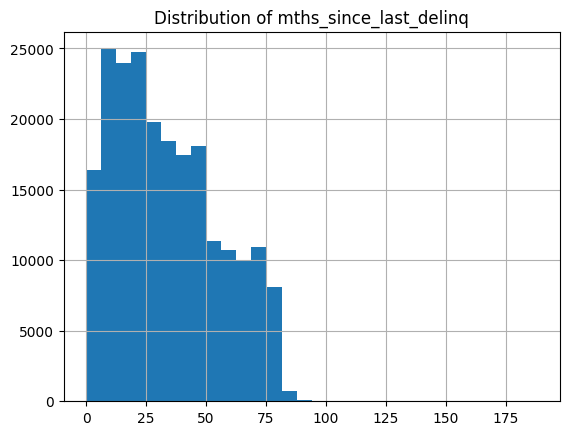

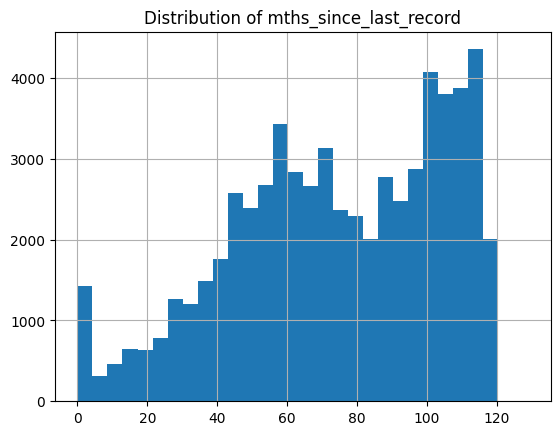

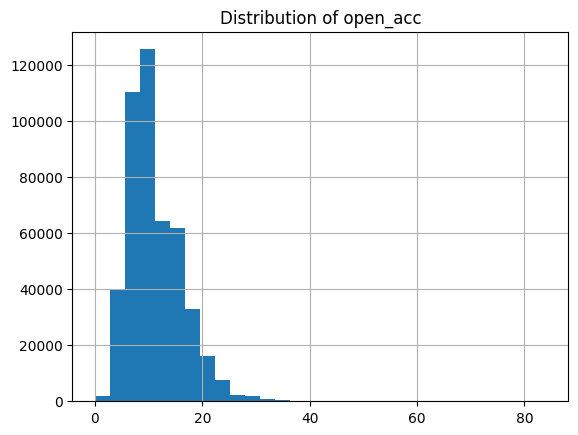

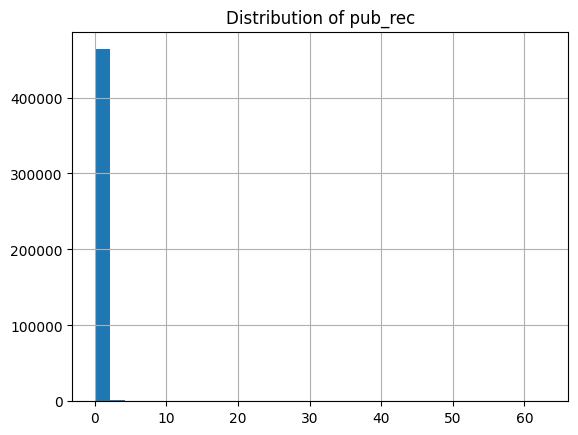

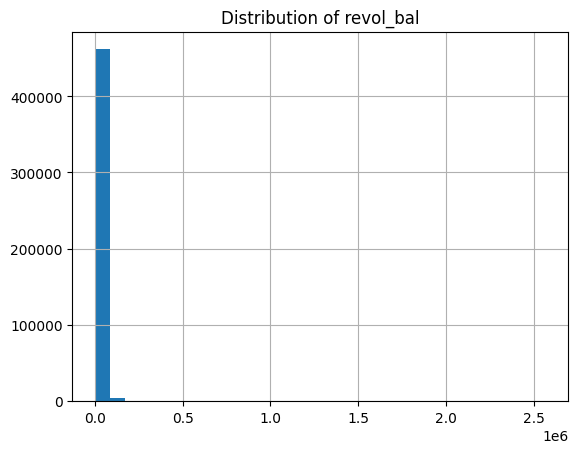

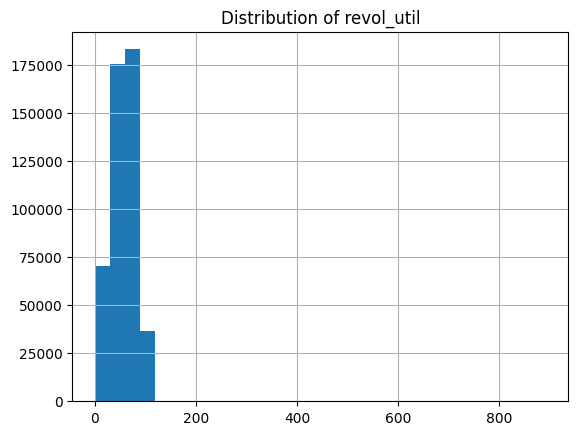

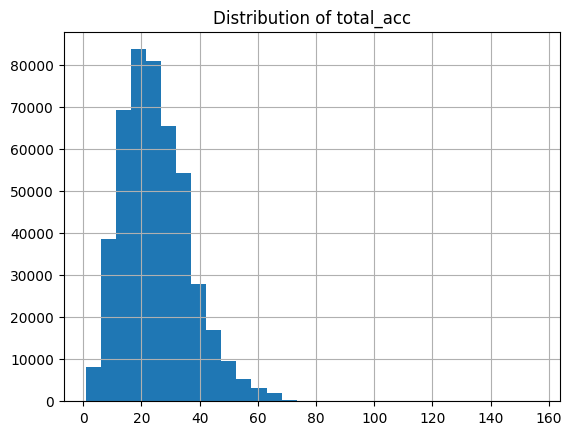

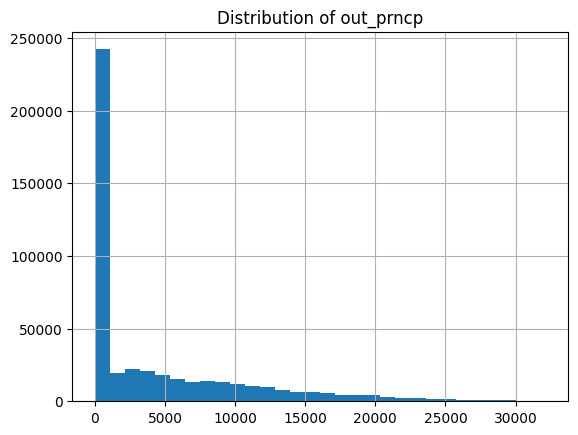

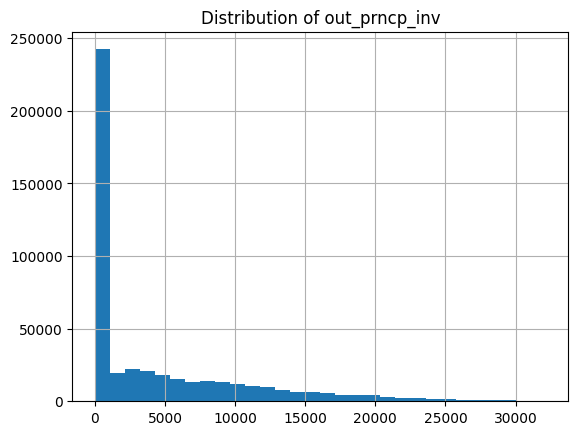

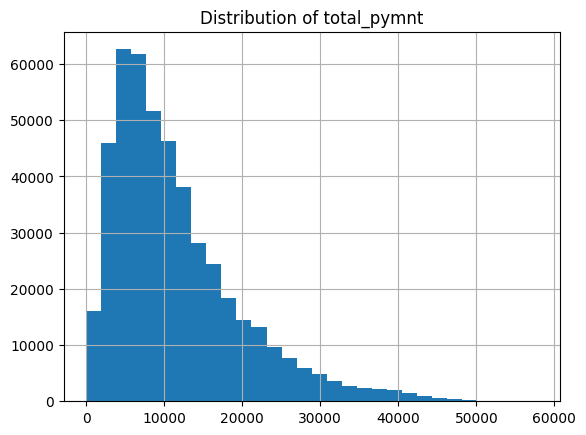

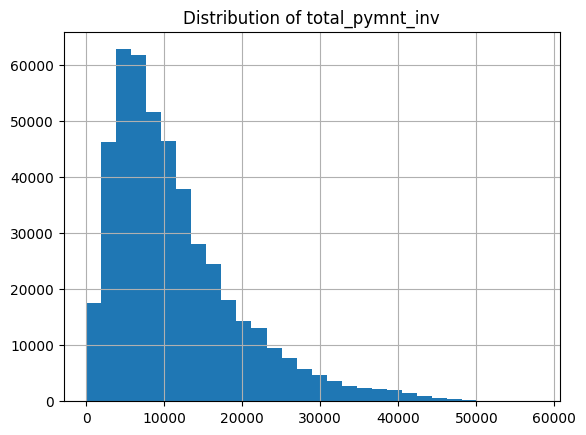

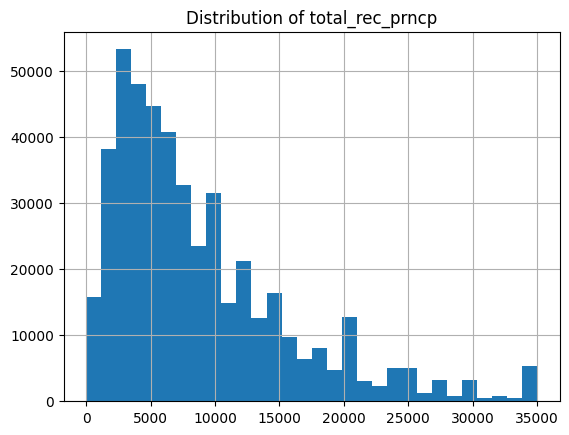

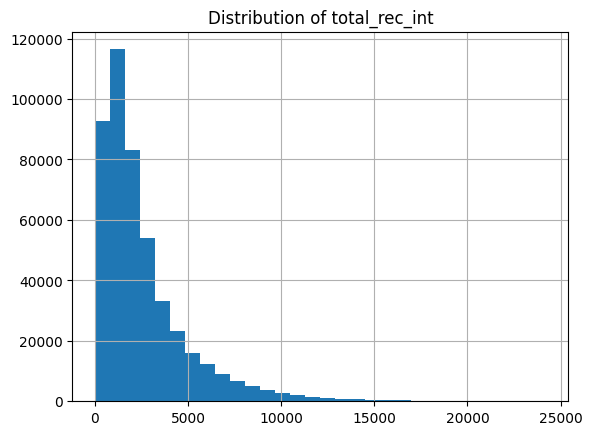

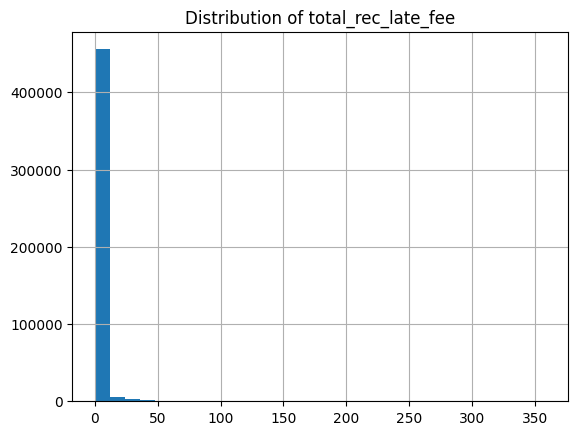

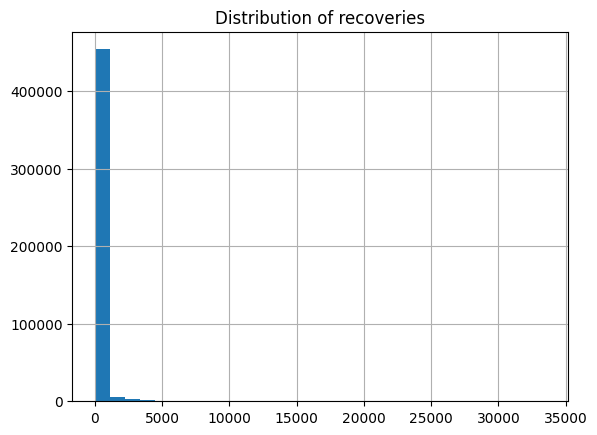

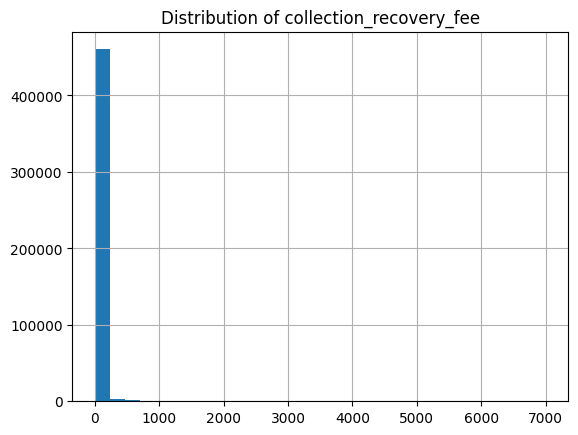

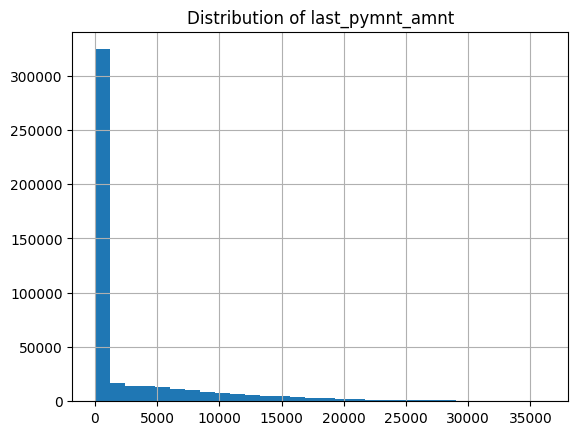

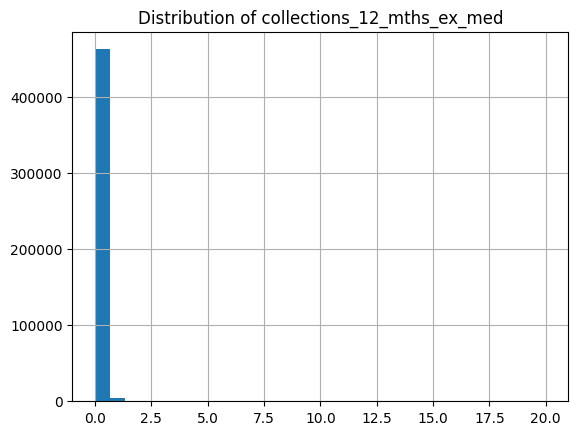

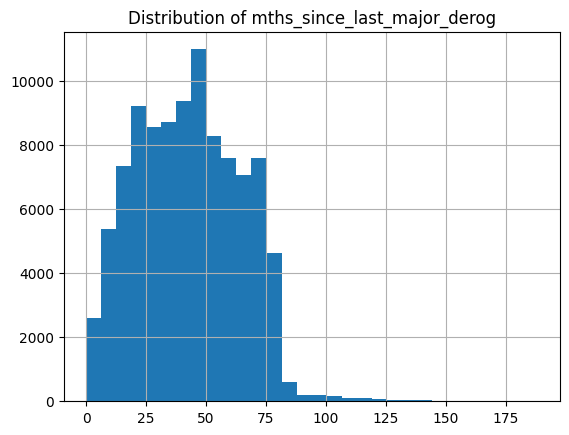

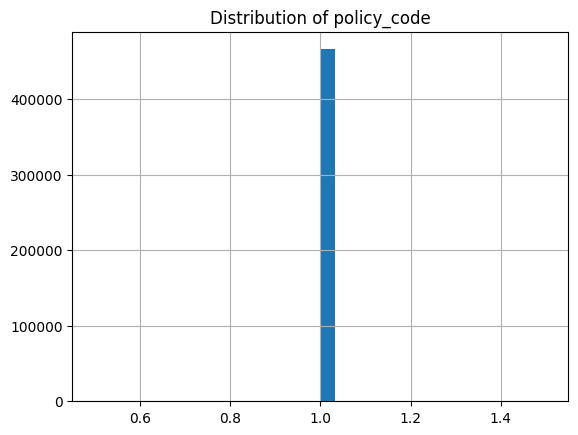

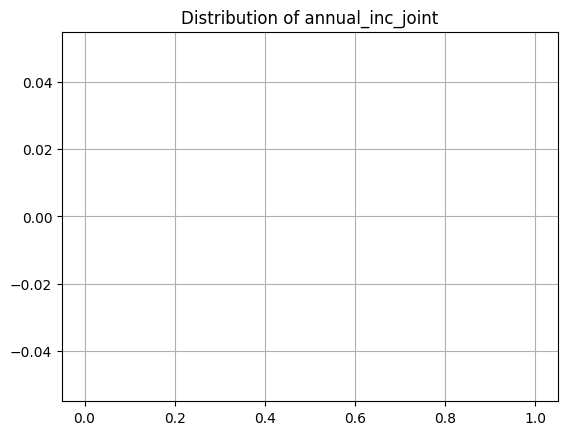

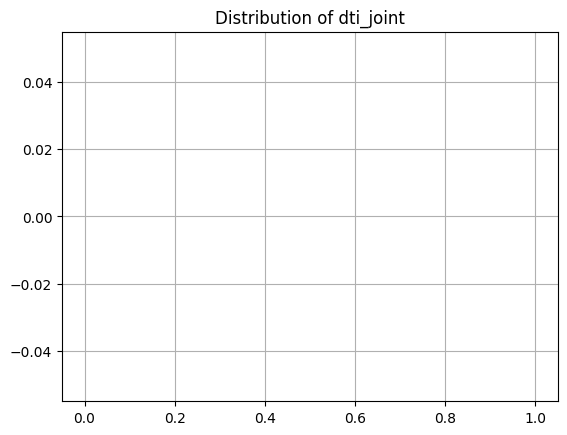

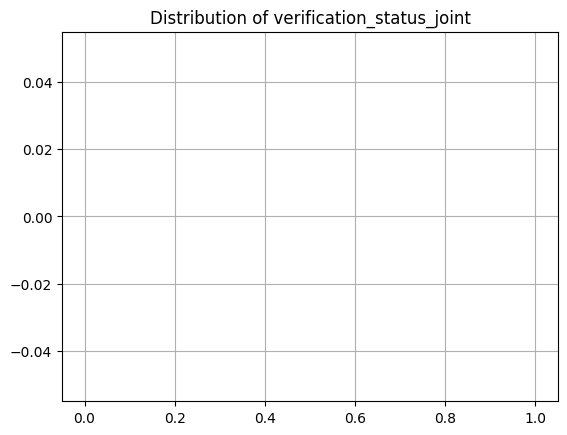

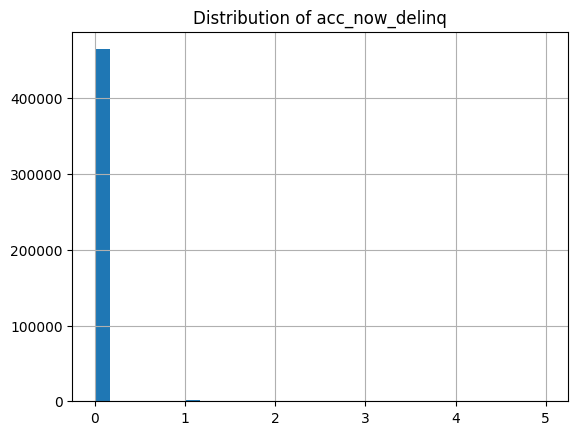

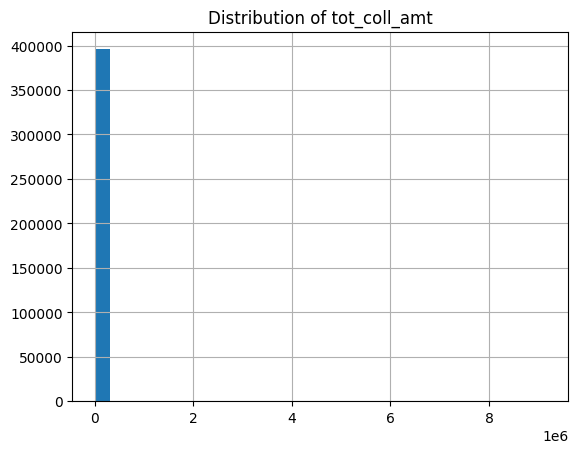

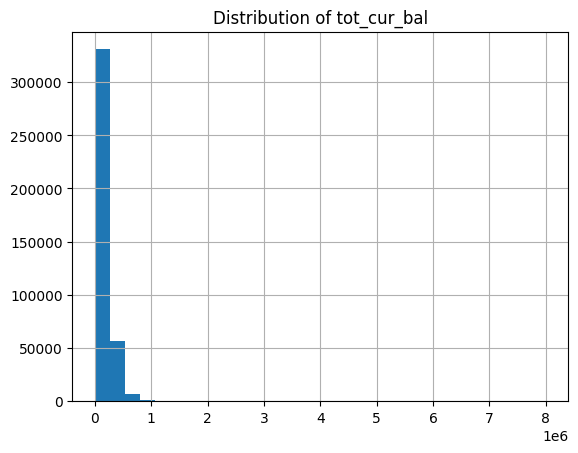

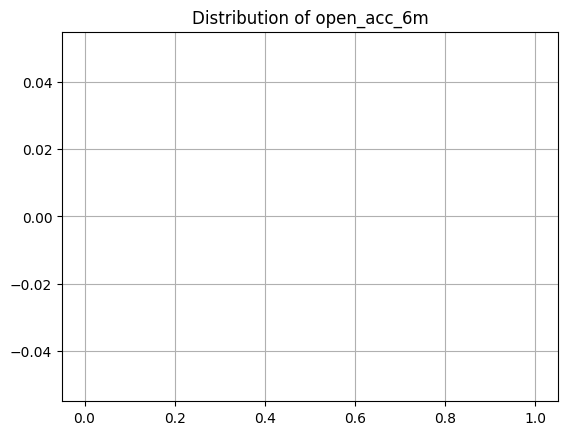

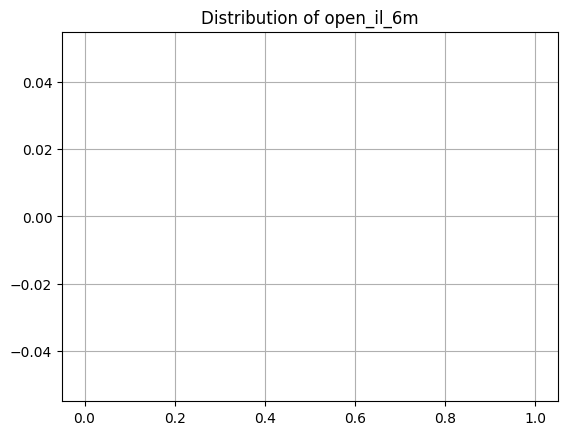

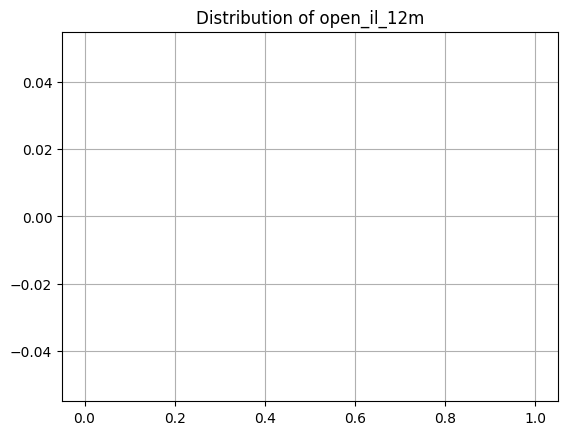

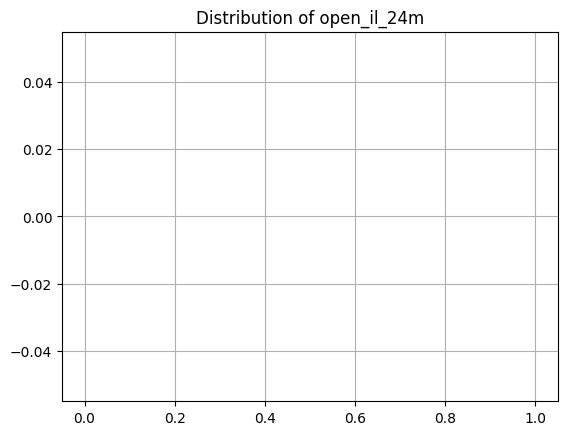

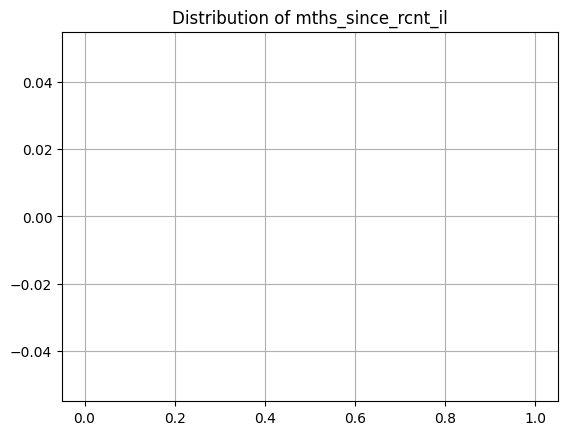

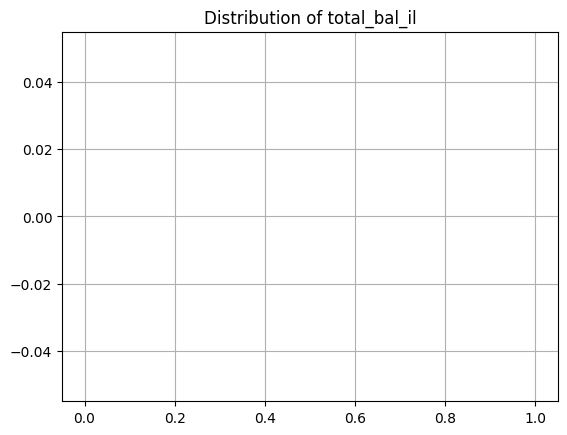

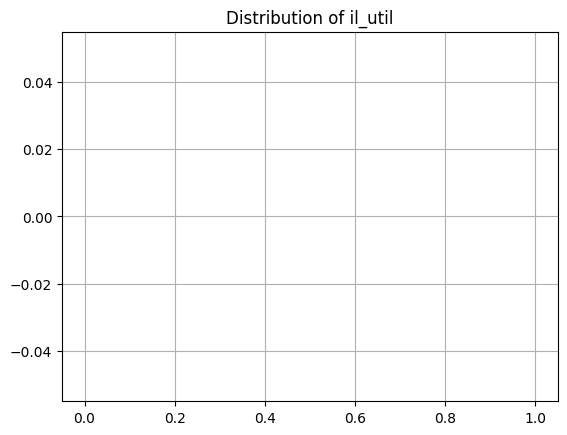

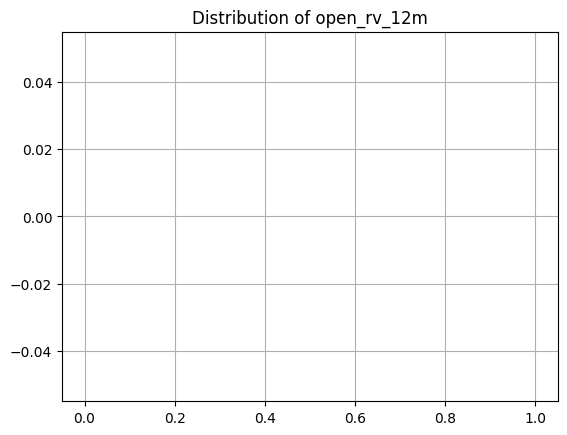

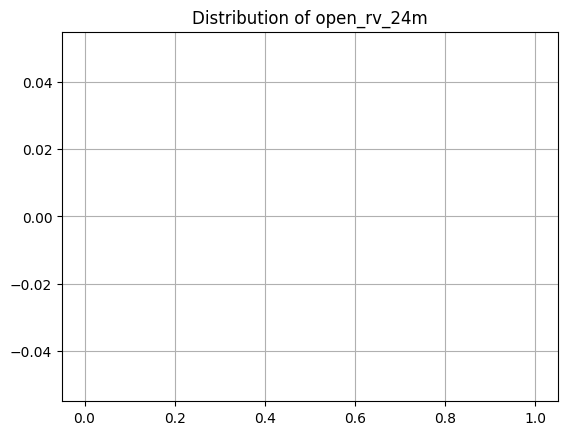

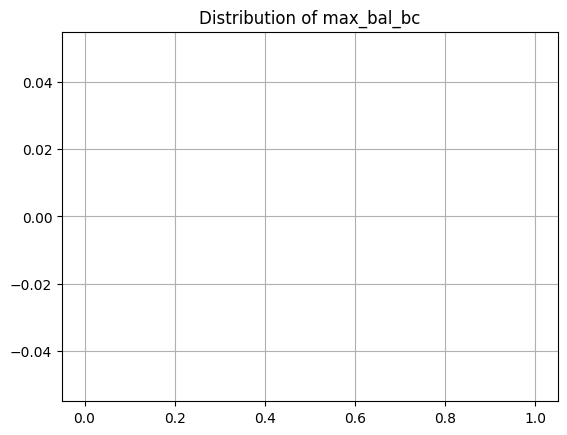

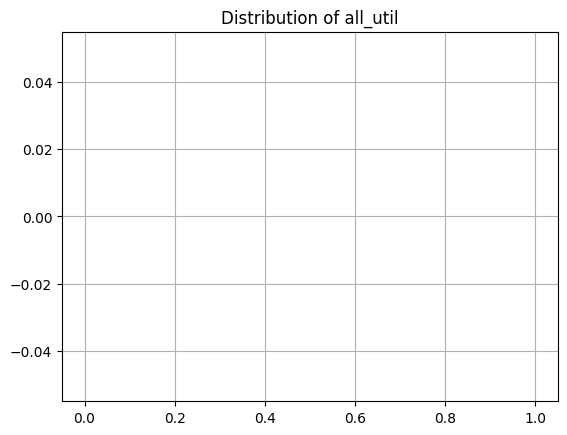

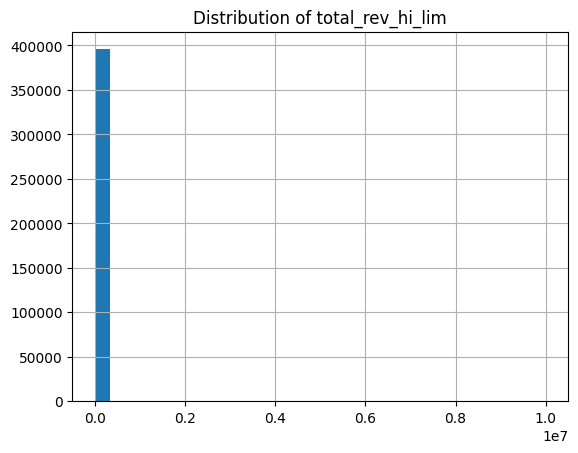

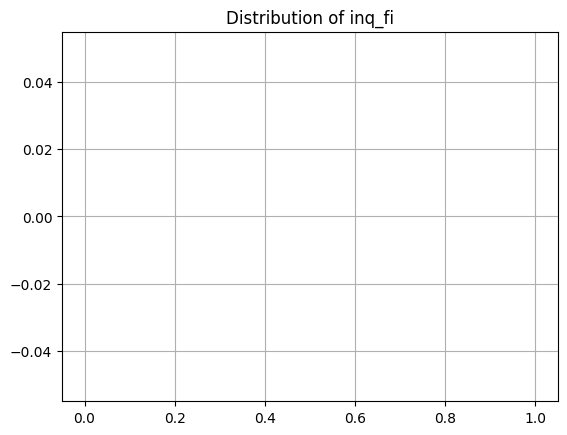

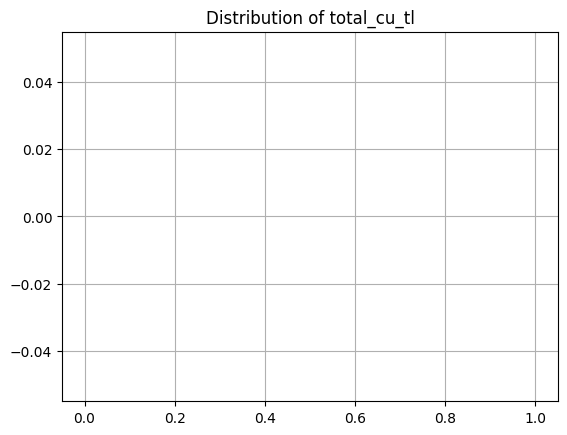

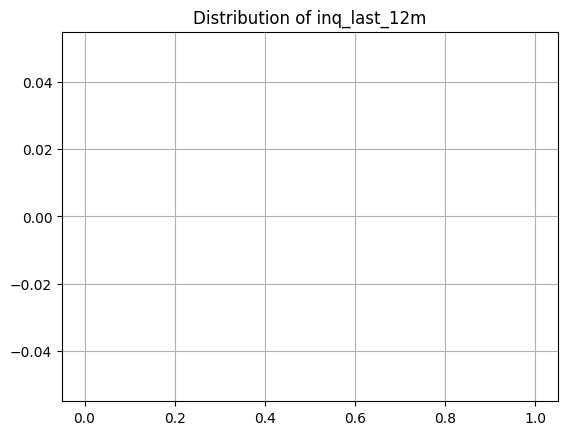

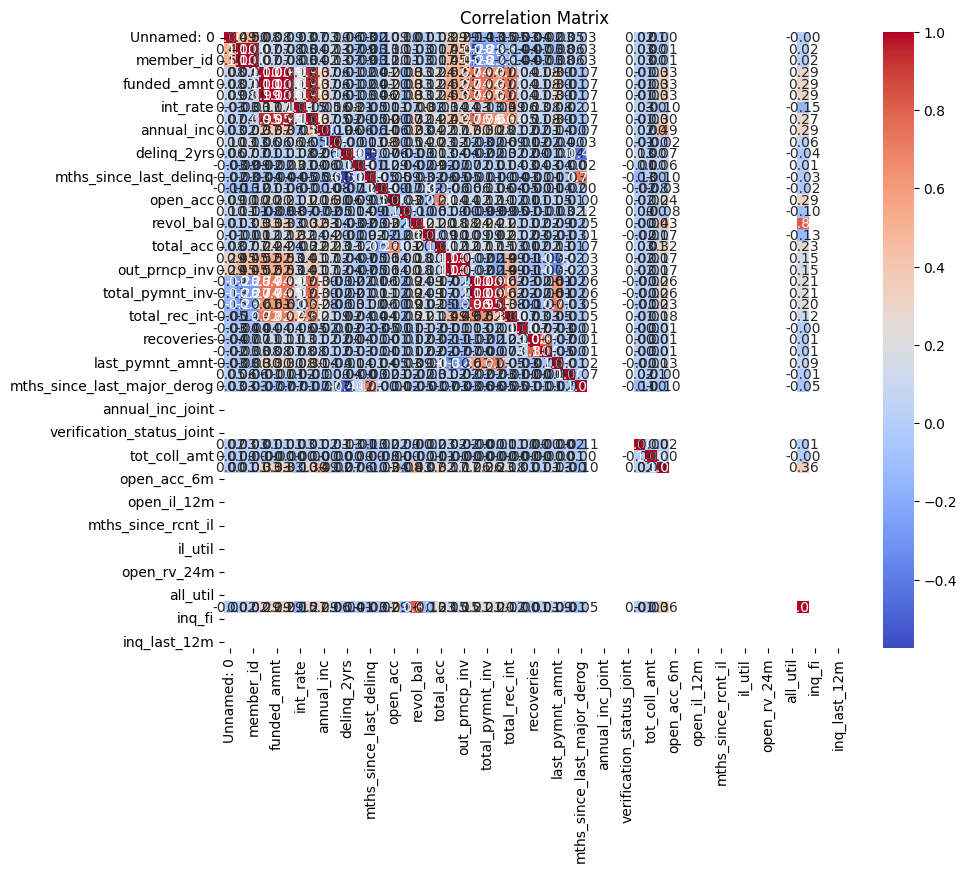

In [7]:
# Contoh histogram fitur numerik
numeric_cols, categorical_cols = identify_columns(df)
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Korelasi heatmap (numerik saja)
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

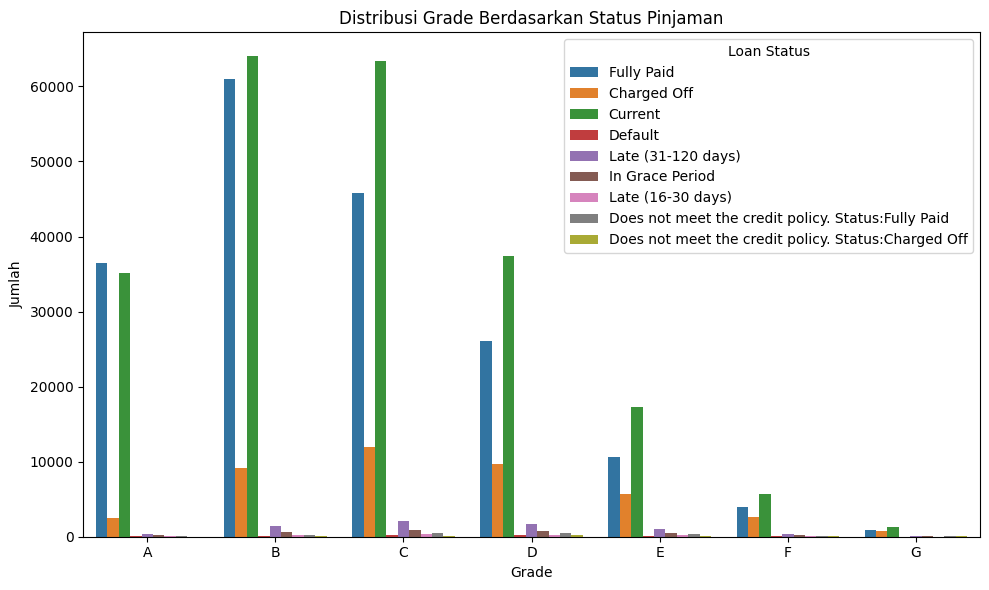

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='grade', hue='loan_status', order=sorted(df['grade'].unique()))
plt.title('Distribusi Grade Berdasarkan Status Pinjaman')
plt.xlabel('Grade')
plt.ylabel('Jumlah')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

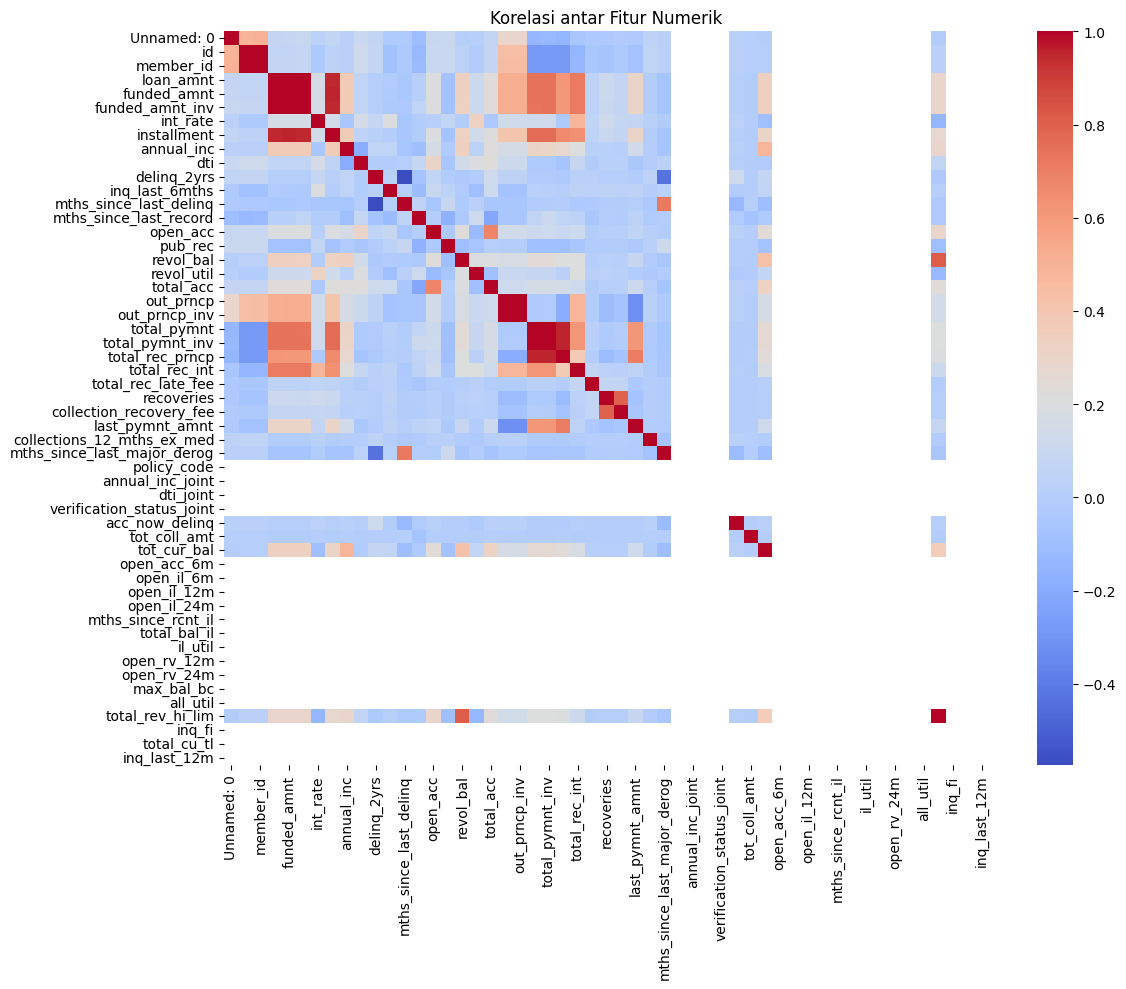

In [9]:
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

## 4. Data Preparation
Menentukan label, handle missing, encoding, scaling, split.

Menampilkan kolom yang dapat digunakan sebagai sumber label

In [10]:
print(df['loan_status'].value_counts())

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


In [11]:
# Contoh penentuan label (sesuaikan dengan data dictionary)
# Misal kolom 'loan_status': map ke 1 (BAD) dan 0 (GOOD)
bad_status = [
    'Charged Off',
    'Default',
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off',
    'In Grace Period',
    'Current'
]

df['target'] = df['loan_status'].apply(lambda x: 1 if x in bad_status else 0)

# Drop rows missing target
df = df.dropna(subset=['target'])

print(df['target'].value_counts())

target
1    279558
0    186727
Name: count, dtype: int64


In [12]:
print(df['target'].value_counts(normalize=True).map("{:.2%}".format))

target
1    59.95%
0    40.05%
Name: proportion, dtype: object


Drop Kolom yang Tidak Relevan

In [13]:
cols_irrel = ['Unnamed: 0',
              'id',
              'member_id',
              'url',
              'desc',
              'title',
              'out_prncp',
              'out_prncp_inv',
              'total_pymnt',
              'total_pymnt_inv',
              'total_rec_prncp',
              'total_rec_int',
              'total_rec_late_fee',
              'recoveries',
              'collection_recovery_fee',
              'last_pymnt_d',
              'last_pymnt_amnt',
              'next_pymnt_d',
              'last_credit_pull_d',
              'policy_code',
              'zip_code'
]

Drop Kolom dengan 100% Missing Value

In [15]:
cols_all_null = df.columns[df.isnull().mean() == 1.0].tolist()

Pertimbangkan Drop Kolom dengan > 80% Missing

In [16]:
cols_high_missing = df.columns[df.isnull().mean() > 0.8].tolist()

Gabung Semua Kolom yang Akan Dibuang

In [17]:
cols_to_drop = cols_irrel + cols_all_null + cols_high_missing

# Filter cols_to_drop to only include columns present in df
cols_to_drop_existing = [col for col in df.columns if col in cols_to_drop]

# Print columns being dropped for debugging
print(f"Attempting to drop columns: {cols_to_drop_existing}")

# Drop only the existing columns
df.drop(columns=cols_to_drop_existing, inplace=True)
initial_inspection(df)

Attempting to drop columns: ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
Shape: (466285, 37)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,9.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,4.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,10.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,37.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,38.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

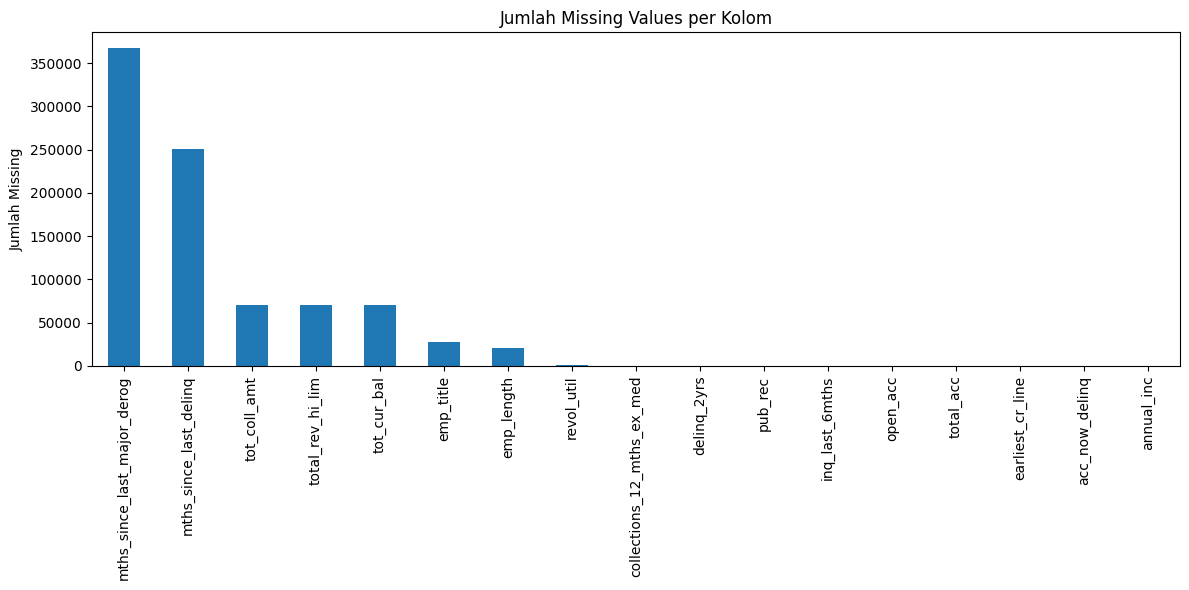

In [23]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))
missing.plot(kind='bar')
plt.title('Jumlah Missing Values per Kolom')
plt.ylabel('Jumlah Missing')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
# Ambil nama kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Kalau label 'loan_status' sudah jadi target, drop dari daftar fitur
categorical_cols = [c for c in categorical_cols if c not in ['loan_status']]

# Ambil nama kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pastikan kolom target tidak ikut
numeric_cols = [c for c in numeric_cols if c != 'target']

In [19]:
preprocessor = build_preprocessing_pipeline(
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
    impute_strategy='median',
    scaling=True
)

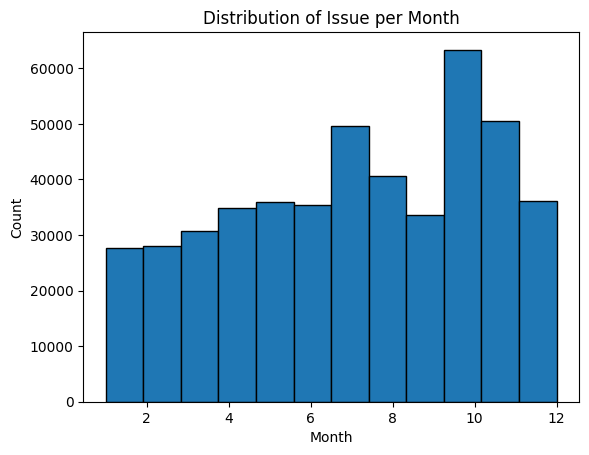

In [31]:
# Identifikasi kolom fitur
X = df.drop(columns=['loan_status', 'target'], errors='ignore')

# Convert date columns to datetime, coercing errors
X['issue_d'] = pd.to_datetime(X['issue_d'], format='%b-%y', errors='coerce')
X['issue_d_month'] = X['issue_d'].dt.month
X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'], format='%b-%y', errors='coerce')
X['earliest_cr_year'] = X['earliest_cr_line'].dt.year

# issue_month = pd.to_datetime(X['issue_d'], format='%b-%y').dt.month
plt.hist(X['issue_d_month'].dropna(), bins=12, edgecolor='k')
plt.title('Distribution of Issue per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Drop original date columns
X = X.drop(columns=['issue_d', 'earliest_cr_line'])

y = df['target']

numeric_cols, categorical_cols = identify_columns(X)
preprocessor = build_preprocessing_pipeline(numeric_cols, categorical_cols)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Fit-transform
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

## 5. Modeling
Logistic Regression dan Random Forest dengan hyperparameter tuning.

Training LogisticRegression...
Best params: {'C': 1}
class 0 -> Good 
 class 1 -> Bad
              precision    recall  f1-score   support

           0       0.57      0.66      0.61     37345
           1       0.74      0.67      0.70     55912

    accuracy                           0.66     93257
   macro avg       0.66      0.66      0.66     93257
weighted avg       0.67      0.66      0.67     93257

ROC-AUC: 0.7171956017911665


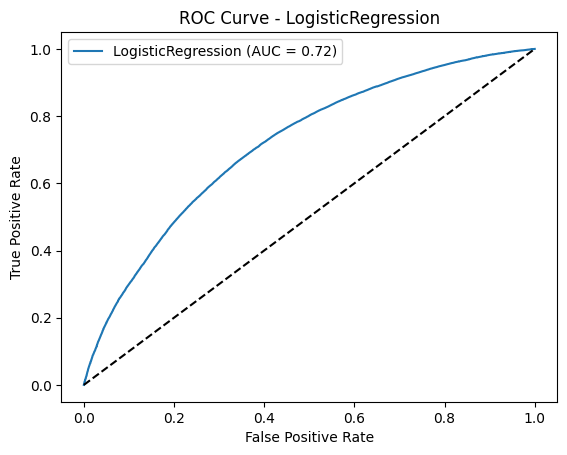

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
}
param_grids = {
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10]}
}

best_estimators = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train_proc, y_train)
    best = grid.best_estimator_
    best_estimators[name] = best
    print(f"Best params: {grid.best_params_}")
    # Evaluate
    y_pred = best.predict(X_test_proc)
    y_proba = best.predict_proba(X_test_proc)[:, 1]
    print("class 0 -> Good \n class 1 -> Bad")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.48      0.58     37345
           1       0.72      0.89      0.79     55912

    accuracy                           0.72     93257
   macro avg       0.73      0.68      0.69     93257
weighted avg       0.73      0.72      0.71     93257

XGBoost ROC‑AUC: 0.767374758626973


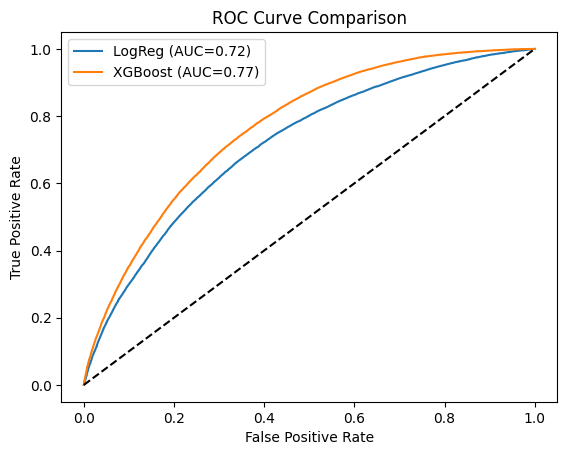

In [33]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Buat pipeline XGBoost
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        eval_metric='auc',
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    ))
])

# Training
xgb_pipeline.fit(X_train, y_train)

# Prediksi & evaluasi
y_proba = xgb_pipeline.predict_proba(X_test)[:, 1]
y_pred = xgb_pipeline.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("XGBoost ROC‑AUC:", roc_auc_score(y_test, y_proba))

# ROC curve overlay
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_estimators['LogisticRegression'].predict_proba(X_test_proc)[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba)
plt.figure()
# Access fpr_lr and tpr_lr from the previous cell
plt.plot(fpr_lr, tpr_lr, label=f'LogReg (AUC={roc_auc_score(y_test, best_estimators["LogisticRegression"].predict_proba(X_test_proc)[:,1]):.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## 6. Evaluation
Analisis metrik dan feature importance.

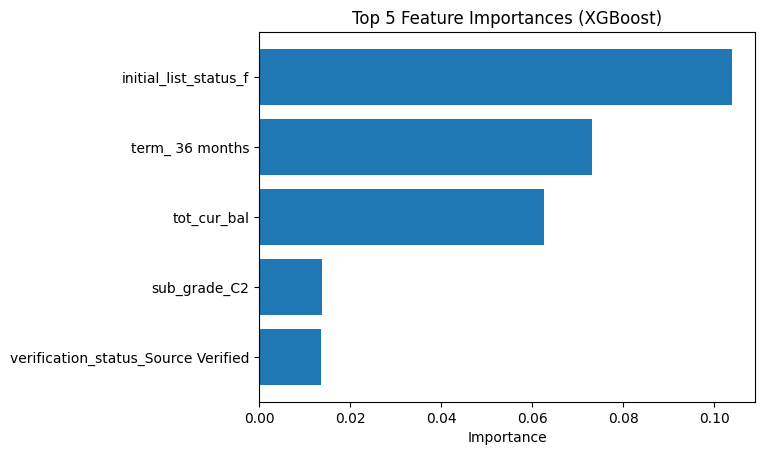

In [ ]:
# ─── 7. Feature Importance (Top 5) ──────────────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt

# Ambil estimator XGBoost terbaik dari GridSearch
# Use the trained xgb_pipeline instead of xgb_search
best_xgb = xgb_pipeline.named_steps['classifier']

# Buat list nama fitur setelah preprocessing
# (numeric_cols sudah ada; fitur kategorial di-expansi dari one-hot)
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feat_names = ohe.get_feature_names_out(categorical_cols)
feat_names = numeric_cols + list(cat_feat_names)

# Ambil importances dan pilih top 5
importances = best_xgb.feature_importances_
top_idx = np.argsort(importances)[-5:]
top_feats = [feat_names[i] for i in top_idx]
top_vals  = importances[top_idx]

# Plot horizontal bar chart
plt.figure()
plt.barh(top_feats, top_vals)
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances (XGBoost)')
plt.show()